In [1]:
import cv2
import math
import copy
from scipy import ndimage
import matplotlib.pyplot as plt

In [2]:
import solver
from solver import *

In [3]:
import utils
from utils import *

In [4]:

import pytesseract
pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files/Tesseract-OCR/tesseract.exe'
import keyboard

In [6]:
#Example
predicted_digits = [[5, 3, 0, 0, 7, 0, 0, 0, 0],
                   [6, 0, 0, 1, 9, 5, 0, 0, 0], 
                   [0, 9, 8, 0, 0, 0, 0, 6, 0],
                   [8, 0, 0, 0, 6, 0, 0, 0, 3],
                   [4, 0, 0, 8, 0, 3, 0, 0, 1],
                   [7, 0, 0, 0, 2, 0, 0, 0, 6],
                   [0, 6, 0, 0, 0, 0, 2, 8, 0],
                   [0, 0, 0, 4, 1, 9, 0, 0, 5],
                   [0, 0, 0, 0, 8, 0, 0, 7, 9]]

In [7]:
solver.solve_sudoku(predicted_digits)

In [8]:
predicted_digits

[[5, 3, 4, 6, 7, 8, 9, 1, 2],
 [6, 7, 2, 1, 9, 5, 3, 4, 8],
 [1, 9, 8, 3, 4, 2, 5, 6, 7],
 [8, 5, 9, 7, 6, 1, 4, 2, 3],
 [4, 2, 6, 8, 5, 3, 7, 9, 1],
 [7, 1, 3, 9, 2, 4, 8, 5, 6],
 [9, 6, 1, 5, 3, 7, 2, 8, 4],
 [2, 8, 7, 4, 1, 9, 6, 3, 5],
 [3, 4, 5, 2, 8, 6, 1, 7, 9]]

# Capturing the frame

In [95]:
import cv2

cap = cv2.VideoCapture(0)


print(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
print(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
while(True):
     ret, frame = cap.read()
     cv2.imshow('frame', frame)
    
     if cv2.waitKey(1) & 0xFF == ord('q'):
         break

cap.release()
cv2.destroyAllWindows()

640.0
480.0


# Convert to gray scale

In [29]:
import cv2

cap = cv2.VideoCapture(0)

print(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
print(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while(True):
     ret, frame = cap.read()
     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
     cv2.imshow('gray video', gray)
    
     if cv2.waitKey(1) & 0xFF == ord('q'):
         break

cap.release()
cv2.destroyAllWindows()

640.0
480.0


# Smooth the frame

In [30]:
import cv2

cap = cv2.VideoCapture(0)

print(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
print(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while(True):
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
     

    kernel = np.ones((5, 5), np.float32)/25
    dst = cv2.filter2D(gray, -1, kernel)
    blur = cv2.blur(gray, (5, 5))
    gblur = cv2.GaussianBlur(gray, (5, 5), 0)
    median = cv2.medianBlur(gray, 5)
    bilateralFilter = cv2.bilateralFilter(gray, 9, 75, 75)

    titles = ['image', '2D Convolution', 'blur', 'GaussianBlur', 'median', 'bilateralFilter']
    images = [frame, dst, blur, gblur, median, bilateralFilter]
      
    for i in range(len(images)):
         cv2.namedWindow(titles[i], cv2.WINDOW_NORMAL)
         cv2.imshow(titles[i],images[i])

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

640.0
480.0


# Thresholding

In [31]:
import cv2

cap = cv2.VideoCapture(0)

print(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
print(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while(True):
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
     
    gray = cv2.GaussianBlur(gray, (5,5), 0)
    ret,th1 = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
    th2 = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
                cv2.THRESH_BINARY,11,2)
    th3 = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
                cv2.THRESH_BINARY,11,2)
    titles = ['Original Image', 'Global Thresholding (v = 127)',
                'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
    images = [gray, th1, th2, th3]
    for i in range(4):
         cv2.namedWindow(titles[i], cv2.WINDOW_NORMAL)
         cv2.imshow(titles[i],images[i])

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

640.0
480.0


# Outer Grid Detection

## FIND ALL CONTOURS

In [135]:
import cv2

cap = cv2.VideoCapture(0)

print(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
print(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while(True):
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
     
    gray = cv2.GaussianBlur(gray, (5,5), 0)
    thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
                cv2.THRESH_BINARY,11,2)
    
    contours,hier = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    
    for contour in contours:
        (x, y, w, h) = cv2.boundingRect(contour)
        if cv2.contourArea(contour) >5000 and cv2.contourArea(contour) <100  :
            continue
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
    cv2.imshow('f',frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

    

640.0
480.0


## Larget Grid

In [8]:
import cv2

cap = cv2.VideoCapture(0)

print(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
print(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while(True):
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
     
    gray = cv2.GaussianBlur(gray, (5,5), 0)
    thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
                cv2.THRESH_BINARY,11,2)
    
    contour,hier = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    contour_grille = None
    maxArea = 0
    for c in contour:
        area = cv2.contourArea(c)
        if area > 20000:
            peri = cv2.arcLength(c, True)
            polygone = cv2.approxPolyDP(c, 0.01 * peri, True)
            if area > maxArea and len(polygone) == 4:
                contour_grille = polygone
                maxArea = area
    if contour_grille is not None:
        cv2.drawContours(frame, [contour_grille], 0, (0, 255, 0), 2)
    cv2.imshow('t',frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


640.0
480.0


## Getting perfect image  

In [12]:
import cv2
import operator

margin = 10
case = 28 + 2*margin
perspective_size = 9*case

cap = cv2.VideoCapture(0)

print(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
print(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while(True):
    ret, frame = cap.read()
    p_frame = frame.copy()
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
     
    gray = cv2.GaussianBlur(gray, (5,5), 0)
    thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
                cv2.THRESH_BINARY,11,2)
    
    contour,hier = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    contour_grille = None
    maxArea = 0
    for c in contour:
        area = cv2.contourArea(c)
        if area > 20000:
            peri = cv2.arcLength(c, True)
            polygone = cv2.approxPolyDP(c, 0.01 * peri, True)
            if area > maxArea and len(polygone) == 4:
                contour_grille = polygone
                maxArea = area
    if contour_grille is not None:
        cv2.drawContours(frame, [contour_grille], 0, (0, 255, 0), 2)
        
        corners = get_corners_from_contours(contour_grille, 4)
        
        pts1=np.float32(sort_corners(corners))
        (tl, tr, br, bl) = pts1
        width_A = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
        width_B = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))

        # the height of our Sudoku board
        height_A = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
        height_B = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))

        # take the maximum of the width and height values to reach
        # our final dimensions
        max_width = max(int(width_A), int(width_B))
        max_height = max(int(height_A), int(height_B))

        # construct our destination points which will be used to
        # map the screen to a top-down, "birds eye" view
        dst = np.array([
       [0, 0],
        [max_width - 1, 0],
      [max_width - 1, max_height - 1],
        [0, max_height - 1]], dtype = "float32")

        # calculate the perspective transform matrix and warp
        # the perspective to grab the screen
        perspective_transformed_matrix = cv2.getPerspectiveTransform(pts1, dst)
        warp = cv2.warpPerspective(frame, perspective_transformed_matrix, (max_width, max_height))
        orginal_warp = np.copy(warp)
                
    
    cv2.imshow('f',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


640.0
480.0


In [13]:
cv2.imshow('p',warp)
cv2.waitKey(0)

-1

In [14]:
warp.shape

(347, 343, 3)

# Process the extracted Sudoku Grid

In [81]:
p_window = cv2.cvtColor(warp, cv2.COLOR_BGR2GRAY)

## Smoothing

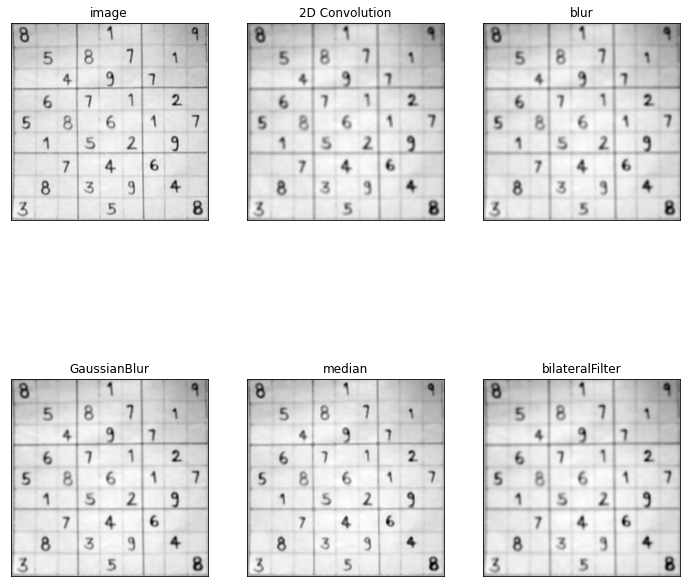

In [93]:
kernel = np.ones((5, 5), np.float32)/25
dst = cv2.filter2D(p_window, -1, kernel)
blur = cv2.blur(p_window, (5, 5))
gblur = cv2.GaussianBlur(p_window, (5, 5), 0)
median = cv2.medianBlur(p_window, 5)
bilateralFilter = cv2.bilateralFilter(p_window, 7, 75, 75)

titles = ['image', '2D Convolution', 'blur', 'GaussianBlur', 'median', 'bilateralFilter']
images = [p_window, dst, blur, gblur, median, bilateralFilter]
fig = plt.figure(figsize=(12, 12))
for i in range(6):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])



## Thresholding

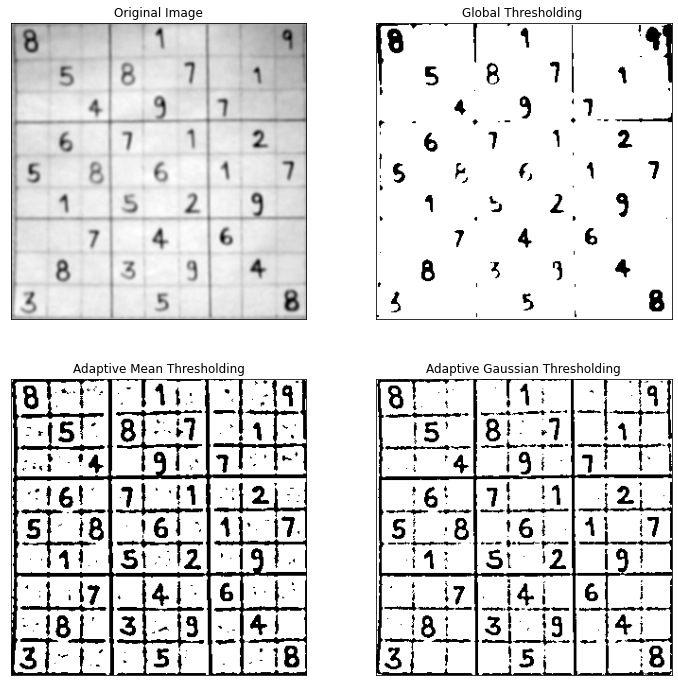

In [104]:
ret,th1 = cv2.threshold(p_window ,140,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(p_window ,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(p_window ,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding ',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [p_window , th1, th2, th3]

fig = plt.figure(figsize=(12, 12))
for i in range(4):
    plt.subplot(2, 2, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])



In [122]:
p_window = cv2.cvtColor(warp, cv2.COLOR_BGR2GRAY)
p_window = cv2.GaussianBlur(p_window, (5, 5), 0)
p_window = cv2.adaptiveThreshold(p_window, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,11, 2)
p= cv2.bitwise_not(p_window)
_,p = cv2.threshold(p, 200, 255, cv2.THRESH_BINARY)

In [123]:
cv2.imshow('pq',p)
cv2.waitKey(0)

-1

## Number searching

In [91]:
# Init grid to store Sudoku Board digits
SIZE = 9
grid = []
for i in range(SIZE):
    row = []
    for j in range(SIZE):
        row.append(0)
    grid.append(row)

In [92]:
grid

[[0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [93]:
p.shape

(347, 343)

In [94]:
height =p.shape[0] // 9
width =p.shape[1] // 9

In [95]:
height

38

In [96]:
width

38

In [97]:
offset_width = math.floor(width / 10)    # Offset is used to get rid of the boundaries
offset_height = math.floor(height / 10)
print(offset_width,offset_height)

3 3


##

In [111]:
from scipy import ndimage
for i in range(SIZE):
        for j in range(SIZE):

            # Crop with offset (We don't want to include the boundaries)
            crop_image = p[height*i+offset_height:height*(i+1)-offset_height, width*j+offset_width:width*(j+1)-offset_width]        
            
            # There are still some boundary lines left though
            # => Remove all black lines near the edges
            # ratio = 0.6 => If 60% pixels are black, remove
            # Notice as soon as we reach a line which is not a black line, the while loop stops
            ratio = 0.6        
            # Top
            while np.sum(crop_image[0]) <= (1-ratio) * crop_image.shape[1] * 255:
                crop_image = crop_image[1:]
            # Bottom
            while np.sum(crop_image[:,-1]) <= (1-ratio) * crop_image.shape[1] * 255:
                crop_image = np.delete(crop_image, -1, 1)
            # Left
            while np.sum(crop_image[:,0]) <= (1-ratio) * crop_image.shape[0] * 255:
                crop_image = np.delete(crop_image, 0, 1)
            # Right
            while np.sum(crop_image[-1]) <= (1-ratio) * crop_image.shape[0] * 255:
                crop_image = crop_image[:-1]    

            # Take the largestConnectedComponent (The digit), and remove all noises
            crop_image = cv2.bitwise_not(crop_image)
            crop_image = largest_connected_component(crop_image)
           
            # Resize
            digit_pic_size = 28
            crop_image = cv2.resize(crop_image, (digit_pic_size,digit_pic_size))
            
            # If this is a white cell, set grid[i][j] to 0 and continue on the next image:

            # Criteria 1 for detecting white cell:
            # Has too little black pixels
            if crop_image.sum() >= digit_pic_size**2*255 - digit_pic_size * 1 * 255:
                grid[i][j] == 0
                continue
       
                
            # Now we are quite certain that this crop_image contains a number

            # Store the number of rows and cols
            rows, cols = crop_image.shape
           

            # Apply Binary Threshold to make digits more clear
            _, crop_image = cv2.threshold(crop_image, 200, 255, cv2.THRESH_BINARY) 
            crop_image = crop_image.astype(np.uint8)
            
            crop_image = cv2.bitwise_not(crop_image)
            shift_x, shift_y = get_best_shift(crop_image)
            shifted = shift(crop_image,shift_x,shift_y)
            crop_image = shifted
           

            crop_image = cv2.bitwise_not(crop_image)
            
            #cv2.imshow(str(i)+str(j),crop_image)
             # Recognize digits
            prediction = pytesseract.image_to_string(crop_image, lang='eng', config='--psm 6')
            grid[i][j] =prediction
            
            if type(grid[i][j]) is not int:
                grid[i][j]=int(grid[i][j].replace('\n\x0c', ""))

            

IndexError: index 0 is out of bounds for axis 0 with size 0

In [42]:
grid

[[8, 0, 0, 0, 4, 0, 0, 0, 4],
 [0, 5, 0, 8, 0, 4, 0, 4, 0],
 [0, 0, 6, 0, 4, 0, 7, 0, 0],
 [0, 6, 0, 4, 0, 4, 0, 2, 0],
 [8, 0, 8, 0, 6, 0, 4, 0, 4],
 [0, 4, 0, 5, 0, 2, 0, 2, 0],
 [0, 0, 8, 0, 2, 4, 6, 0, 0],
 [0, 2, 0, 3, 0, 8, 0, 4, 0],
 [3, 0, 4, 0, 5, 0, 0, 0, 8]]

# Define Functions

In [24]:
def extract_image_from_frame(warp,image):
    
        global perspective_transformed_matrix
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        gray = cv2.GaussianBlur(gray, (5,5), 0)
        thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
                    cv2.THRESH_BINARY,11,2)

        contour,hier = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
        contour_grille = None
        maxArea = 0
        for c in contour:
            area = cv2.contourArea(c)
            if area > 30000:
                peri = cv2.arcLength(c, True)
                polygone = cv2.approxPolyDP(c, 0.01 * peri, True)
                if area > maxArea and len(polygone) == 4:
                    contour_grille = polygone
                    maxArea = area
        if contour_grille is not None:
            cv2.drawContours(image, [contour_grille], 0, (0, 255, 0), 2)
            if keyboard.is_pressed('o'):
                print('Contor detected')
                corners = get_corners_from_contours(contour_grille, 4)

                pts1=np.float32(sort_corners(corners))
                (tl, tr, br, bl) = pts1
                width_A = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
                width_B = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))

                # the height of our Sudoku board
                height_A = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
                height_B = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))

                # take the maximum of the width and height values to reach
                # our final dimensions
                max_width = max(int(width_A), int(width_B))
                max_height = max(int(height_A), int(height_B))

                # construct our destination points which will be used to
                # map the screen to a top-down, "birds eye" view
                dst = np.array([
               [0, 0],
                [max_width - 1, 0],
              [max_width - 1, max_height - 1],
                [0, max_height - 1]], dtype = "float32")

                # calculate the perspective transform matrix and warp
                # the perspective to grab the screen
                perspective_transformed_matrix = cv2.getPerspectiveTransform(pts1, dst)
                warp = cv2.warpPerspective(image, perspective_transformed_matrix, (max_width, max_height))
                orginal_warp = np.copy(warp)

            
        if warp is not None:
            return warp  
        
        

In [25]:
def preprocess_warp(image):
        p_window = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        p_window = cv2.GaussianBlur(p_window, (5, 5), 0)
        p_window = cv2.adaptiveThreshold(p_window, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,11, 2)
        p= cv2.bitwise_not(p_window)
        _,p = cv2.threshold(p, 200, 255, cv2.THRESH_BINARY)
        return p
    

In [34]:
def find_grid(image):
    # Init grid to store Sudoku Board digits
    SIZE = 9
    grid = []
    for i in range(SIZE):
        row = []
        for j in range(SIZE):
            row.append(0)
        grid.append(row)
    
    height = image.shape[0] // 9
    width =image.shape[1] // 9

    offset_width = math.floor(width / 10)    # Offset is used to get rid of the boundaries
    offset_height = math.floor(height / 10)

    
    for i in range(SIZE):
        for j in range(SIZE):
            try:
                # Crop with offset (We don't want to include the boundaries)
                crop_image = image[height*i+offset_height:height*(i+1)-offset_height, width*j+offset_width:width*(j+1)-offset_width]        

                # There are still some boundary lines left though
                # => Remove all black lines near the edges
                # ratio = 0.6 => If 60% pixels are black, remove
                # Notice as soon as we reach a line which is not a black line, the while loop stops
                ratio = 0.6        
                # Top
                while np.sum(crop_image[0]) <= (1-ratio) * crop_image.shape[1] * 255:
                    crop_image = crop_image[1:]
                # Bottom
                while np.sum(crop_image[:,-1]) <= (1-ratio) * crop_image.shape[1] * 255:
                    crop_image = np.delete(crop_image, -1, 1)
                # Left
                while np.sum(crop_image[:,0]) <= (1-ratio) * crop_image.shape[0] * 255:
                    crop_image = np.delete(crop_image, 0, 1)
                # Right
                while np.sum(crop_image[-1]) <= (1-ratio) * crop_image.shape[0] * 255:
                    crop_image = crop_image[:-1]    

                # Take the largestConnectedComponent (The digit), and remove all noises
                crop_image = cv2.bitwise_not(crop_image)
                crop_image = largest_connected_component(crop_image)

                # Resize
                digit_pic_size = 28
                crop_image = cv2.resize(crop_image, (digit_pic_size,digit_pic_size))

                # If this is a white cell, set grid[i][j] to 0 and continue on the next image:

                # Criteria 1 for detecting white cell:
                # Has too little black pixels
                if crop_image.sum() >= digit_pic_size**2*255 - digit_pic_size * 1 * 255:
                    grid[i][j] == 0
                    continue
                # Criteria 2 for detecting white cell
                # Huge white area in the center
                center_width = crop_image.shape[1] // 2
                center_height = crop_image.shape[0] // 2
                x_start = center_height // 2
                x_end = center_height // 2 + center_height
                y_start = center_width // 2
                y_end = center_width // 2 + center_width
                center_region = crop_image[x_start:x_end, y_start:y_end]

                if center_region.sum() >= center_width * center_height * 255 - 255:
                    grid[i][j] = 0
                    continue

                # Now we are quite certain that this crop_image contains a number

                # Store the number of rows and cols
                rows, cols = crop_image.shape


                # Apply Binary Threshold to make digits more clear
                _, crop_image = cv2.threshold(crop_image, 200, 255, cv2.THRESH_BINARY) 
                crop_image = crop_image.astype(np.uint8)

                crop_image = cv2.bitwise_not(crop_image)
                shift_x, shift_y = get_best_shift(crop_image)
                shifted = shift(crop_image,shift_x,shift_y)
                crop_image = shifted



                crop_image = cv2.bitwise_not(crop_image)

             
                 # Recognize digits
                prediction = pytesseract.image_to_string(crop_image, lang='eng', config='--psm 6')
                grid[i][j] =prediction

                if type(grid[i][j]) is not int:
                    grid[i][j]=int(grid[i][j].replace('\n\x0c', ""))
                    if grid[i][j]=="\x0c":
                        flag=1
                        raise Exception('Space captured try again')

                
            except:
                flag=1
                print('TRY AGAIN')
                

    return grid

In [35]:
#To order predicted digit nested list 
def display_predList(predList):
    predicted_digits = []
    for i in range(len(predList)):
        for j in range(len(predList)):
            predicted_digits.append(predList[j][i])
    
    return predicted_digits

# Main

In [42]:
cap = cv2.VideoCapture(0) 

# Let's turn on webcam
old_sudoku = None
warp=None
width = int(cap.get(cv2. CAP_PROP_FRAME_WIDTH ))
height = int(cap.get(cv2. CAP_PROP_FRAME_HEIGHT))
flag=0
while(cap.isOpened()):
    ret, frame = cap.read() # Read the frame
    
    if ret == True:
        warp1=extract_image_from_frame(warp,frame)
        result=copy.deepcopy(warp1)
        if warp1 is not None:
            print("Wrapping Done")
            clear_warp=preprocess_warp(warp1)
            print("Preprocessing on warp is done")
            
            sudoku_matrix=find_grid(clear_warp)
        
            if flag==0:
                grid1=copy.deepcopy(sudoku_matrix)
                print(sudoku_matrix)
                ans=solver.solve_sudoku(sudoku_matrix)
                pred_digits = display_predList(sudoku_matrix)
                print(sudoku_matrix)
                result=write_solution_on_image(result,sudoku_matrix,grid1)
                cv2.imshow("Result", result)
                
          
            
        cv2.imshow('f',frame)
    
        if cv2.waitKey(1) & 0xFF == ord('q'):   # Hit q if you want to stop the camera
                break
            
cap.release()
cv2.destroyAllWindows()

Contor detected
Wrapping Done
Preprocessing on warp is done
TRY AGAIN
TRY AGAIN
TRY AGAIN
TRY AGAIN
TRY AGAIN
TRY AGAIN
TRY AGAIN
[[5, 3, 0, 0, 7, 0, 0, 0, 0], [6, 0, 0, 1, 9, 5, 0, 0, 0], [0, '9g\n\x0c', '\x0c', 0, 0, 0, 0, 'a\n\x0c', 0], [8, 0, 0, 0, 6, 0, 0, 0, 0], ['a\n\x0c', 0, 0, 8, 0, 3, 0, 0, '\x0c'], ['i\n\x0c', 0, 0, 0, 2, 0, 0, 0, '\x0c'], [0, 6, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 4, 0, 9, 0, 0, 5], [0, 0, 0, 0, 8, 0, 0, 0, 9]]
[[5, 3, 0, 0, 7, 0, 0, 0, 0], [6, 0, 0, 1, 9, 5, 0, 0, 0], [0, '9g\n\x0c', '\x0c', 0, 0, 0, 0, 'a\n\x0c', 0], [8, 0, 0, 0, 6, 0, 0, 0, 0], ['a\n\x0c', 0, 0, 8, 0, 3, 0, 0, '\x0c'], ['i\n\x0c', 0, 0, 0, 2, 0, 0, 0, '\x0c'], [0, 6, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 4, 0, 9, 0, 0, 5], [0, 0, 0, 0, 8, 0, 0, 0, 9]]
